## Diabetes Dataset must be cleaned to handle missing values, mis-spelled words, outliers, and duplicate values

In [64]:
# Importing Libraries
import pandas as pd
import seaborn as sns

In [65]:
# Read data source csv file for Diabetes
df = pd.read_csv("../Diabetes_Data_Cleaning_Viz/DataSource/diabetes_unclean.csv")

### Top Records of DF

In [66]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [67]:
# Check number of columns
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [68]:
# Rename column No_Pation to NumberOfPatients
df.rename(columns = {"No_Pation":"NumberOfPatients"}, inplace =True)

In [69]:
df

,ID,NumberOfPatients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [70]:
df.isnull().sum()

ID                  0
NumberOfPatients    0
Gender              0
AGE                 1
Urea                1
Cr                  2
HbA1c               3
Chol                2
TG                  2
HDL                 1
LDL                 2
VLDL                1
BMI                 0
CLASS               0
dtype: int64

In [71]:
# Replace null values in HbA1c with mean value of the column
mean_val = df["HbA1c"].mean()
mean_val

8.284155069582505

In [72]:
df["HbA1c"].fillna(mean_val)

0        4.900000
1        4.900000
2        4.900000
3        4.900000
4        4.900000
          ...    
1004     6.800000
1005     8.284155
1006     6.700000
1007     9.300000
1008    13.900000
Name: HbA1c, Length: 1009, dtype: float64

In [73]:
# Checking null status of columns
df.isnull().sum()

ID                  0
NumberOfPatients    0
Gender              0
AGE                 1
Urea                1
Cr                  2
HbA1c               3
Chol                2
TG                  2
HDL                 1
LDL                 2
VLDL                1
BMI                 0
CLASS               0
dtype: int64

In [74]:
# Dropping all missing values
df1 = df.dropna()

# Checking null status of columns
df1.isnull().sum()

ID                  0
NumberOfPatients    0
Gender              0
AGE                 0
Urea                0
Cr                  0
HbA1c               0
Chol                0
TG                  0
HDL                 0
LDL                 0
VLDL                0
BMI                 0
CLASS               0
dtype: int64

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                994 non-null    int64  
 1   NumberOfPatients  994 non-null    int64  
 2   Gender            994 non-null    object 
 3   AGE               994 non-null    float64
 4   Urea              994 non-null    float64
 5   Cr                994 non-null    float64
 6   HbA1c             994 non-null    float64
 7   Chol              994 non-null    float64
 8   TG                994 non-null    float64
 9   HDL               994 non-null    float64
 10  LDL               994 non-null    float64
 11  VLDL              994 non-null    float64
 12  BMI               994 non-null    float64
 13  CLASS             994 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 116.5+ KB


In [76]:
df1.groupby('CLASS')['CLASS'].agg("count")

CLASS
N     102
N       1
P      53
Y     830
Y       8
Name: CLASS, dtype: int64

In [77]:
# Check unique types of CLASS
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [78]:
# Replacing space from CLASS
df1["CLASS"] = df1["CLASS"].str.replace("N ","N")
df1["CLASS"] = df1["CLASS"].str.replace("Y ","Y")

/var/folders/3y/c1bnq2657z7c26976g0psx700000gn/T/ipykernel_51950/3807694009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"] = df1["CLASS"].str.replace("N ","N")
/var/folders/3y/c1bnq2657z7c26976g0psx700000gn/T/ipykernel_51950/3807694009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"] = df1["CLASS"].str.replace("Y ","Y")


In [79]:
df1["CLASS"].unique()

array(['N', 'P', 'Y'], dtype=object)

<Axes: ylabel='Cr'>

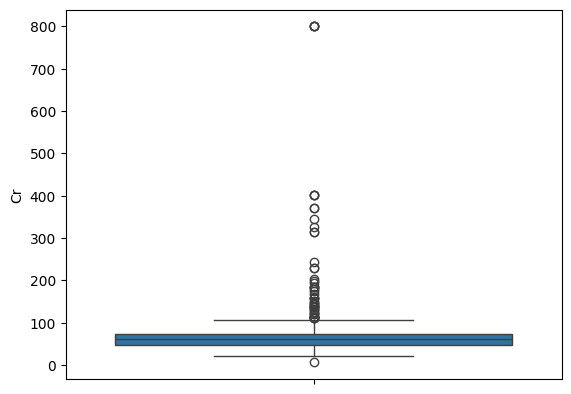

In [80]:
# Checking for outliers in the dataset
sns.boxplot(df["Cr"])

In [81]:
# Choosing maximum quantile to fill in the outliers
max_cr = df["Cr"].quantile(0.995)
max_cr

401.0

In [82]:
df1[df1["Cr"] > max_cr]

,ID,NumberOfPatients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [83]:
# Creating a df without any outliers
df2 = df1[df1["Cr"] < max_cr]

<Axes: ylabel='Cr'>

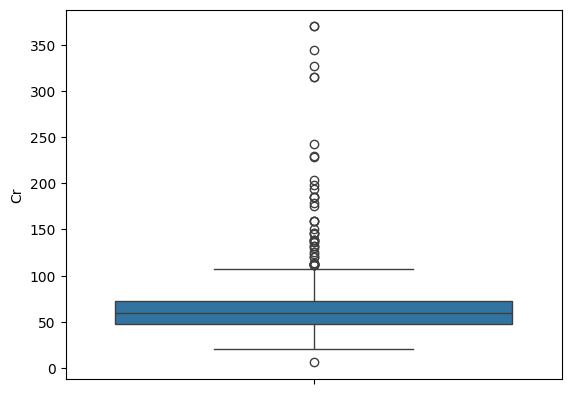

In [84]:
sns.boxplot(df2["Cr"])

<Axes: ylabel='HbA1c'>

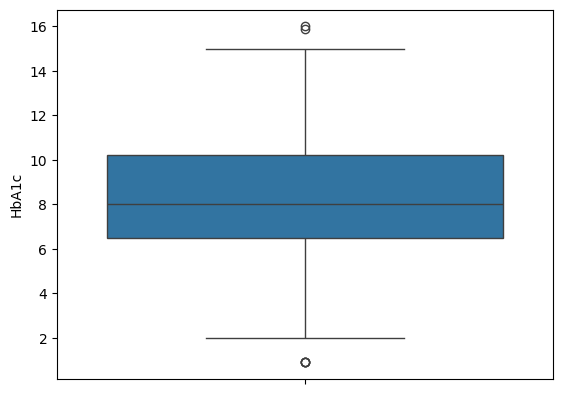

In [85]:
# Checking for outliers in HbA1c
sns.boxplot(df2["HbA1c"])

In [86]:
# Checking for duplicate values
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1000    False
1002     True
1003     True
1007    False
1008     True
Length: 987, dtype: bool

In [87]:
# Dropping all duplicates
df3 = df2.drop_duplicates()

In [88]:
df3.duplicated().sum()

0

In [89]:
df3['Gender'] = df3['Gender'].str.replace("f","F")

/var/folders/3y/c1bnq2657z7c26976g0psx700000gn/T/ipykernel_51950/1028667131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Gender'] = df3['Gender'].str.replace("f","F")


In [90]:
df3['Gender'].unique()

array(['F', 'M'], dtype=object)

In [91]:
# Saving cleaned data to csv
df3.to_csv("../Diabetes_Data_Cleaning_Viz/DataSource/Cleaned_Diabetes_Data.csv")